<a href="https://colab.research.google.com/github/lamiatasnimkhan/ML/blob/main/Missing_Value_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Income - Sheet1 (1).csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Age,Marital status,Income,Gender,Expense_per_month
0,33.0,Married,23000,Male,22000
1,-2.0,Unmarried,50000,Male,42000
2,45.0,Unmarried,40000,Male,20000
3,20.0,Null,200,Female,220
4,15.0,Unmarried,unknown,Male,20000


In [8]:
# Apply Mode Imputation for categorical columns
categorical_cols = ["Marital status", "Gender"]
for col in categorical_cols:
   df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values left
df.isnull().sum()

,0
Age,0
Marital status,0
Income,0
Gender,0
Expense_per_month,0


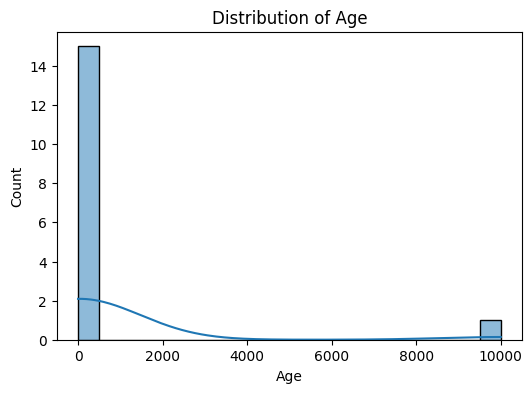

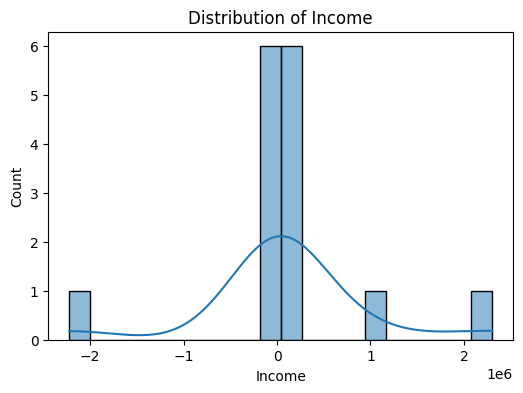

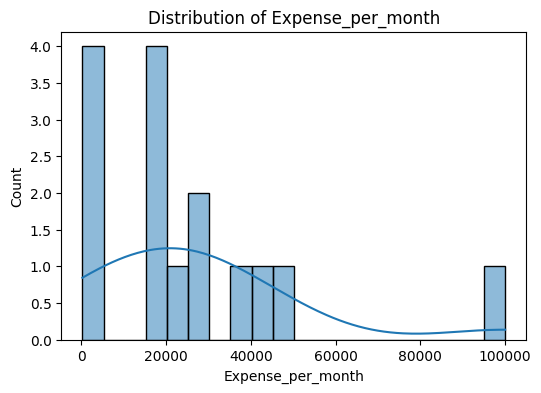

Skewness values:
 Age                  3.999414
Income              -0.112376
Expense_per_month    1.728328
dtype: float64


In [4]:
# Check skewness for numerical columns
numerical_cols = ["Age", "Income", "Expense_per_month"]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# Calculate skewness values
skewness = df[numerical_cols].skew()
print("Skewness values:\n", skewness)

In [9]:
# Filling numerical columns based on skewness
for col in numerical_cols:
    if abs(skewness[col]) > 0.5:
       df[col] = df[col].fillna(df[col].median())  # Skewed → Median Imputation
    else:
       df[col] = df[col].fillna(df[col].mean())  # Normal → Mean Imputation

# Confirm no missing values left
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Age                  0
Marital status       0
Income               0
Gender               0
Expense_per_month    0
dtype: int64


In [7]:
cleaned_file_path = "/content/Income_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned file saved as: {cleaned_file_path}")


Cleaned file saved as: /content/Income_Cleaned.csv
